<a href="https://colab.research.google.com/github/arelies-proximo/Data-Science-Projects/blob/main/Advertisement_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("online_advertising_click.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [5]:
df[df.isna().any(axis=1)]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad


**Total Clicks by Gender**

In [7]:
df.groupby('Male').sum()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Male,,,,,
0,33885.14,18781,28536141.40,92805.9,269
1,31115.06,17228,26463858.68,87194.2,231


In [9]:
df.groupby('Male').sum()["Clicked on Ad"]

Male
0    269
1    231
Name: Clicked on Ad, dtype: int64

<BarContainer object of 2 artists>

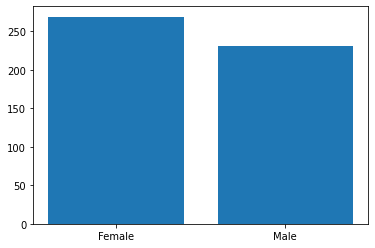

In [15]:
plt.bar(x = ["Female", "Male"],height=df.groupby('Male').sum()["Clicked on Ad"])

**Total Clicks done by Age Group**

In [66]:
clicked_age = df.groupby("Age").sum()["Clicked on Ad"]

In [67]:
clicked_age.nlargest(n=20)

Age
45    27
36    25
38    25
41    22
42    20
40    19
43    19
50    19
39    17
49    17
29    16
30    16
35    16
44    16
33    15
34    15
37    15
48    15
52    15
31    14
Name: Clicked on Ad, dtype: int64

In [68]:
clicked_age.shape

(43,)

In [69]:
type(clicked_age)

pandas.core.series.Series

In [70]:
clicked_age= pd.DataFrame(clicked_age)

In [71]:
clicked_age.sample(10)

,Clicked on Ad
Age,
47,12
20,1
28,13
29,16
34,15
38,25
51,10
27,7
41,22


In [72]:
clicked_age = clicked_age.nlargest(n=20, columns='Clicked on Ad')

In [73]:
clicked_age.index

Int64Index([45, 36, 38, 41, 42, 40, 43, 50, 39, 49, 29, 30, 35, 44, 33, 34, 37,
            48, 52, 31],
           dtype='int64', name='Age')

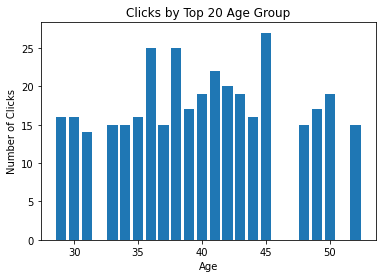

In [74]:
plt.bar(clicked_age.index,clicked_age["Clicked on Ad"])
plt.xlabel("Age")
plt.ylabel("Number of Clicks")
plt.title("Clicks by Top 20 Age Group")
plt.show()

In [76]:
clicked_age["Age Group"] = clicked_age.index

In [78]:
clicked_age.head()

,Clicked on Ad,Age Group
Age,,
45,27,45
36,25,36
38,25,38
41,22,41
42,20,42


In [79]:
clicked_age = clicked_age.sort_values('Age Group')

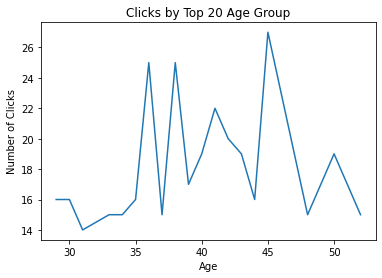

In [82]:
plt.plot(clicked_age['Age Group'],clicked_age["Clicked on Ad"])
plt.xlabel("Age")
plt.ylabel("Number of Clicks")
plt.title("Clicks by Top 20 Age Group")
plt.show()

In [83]:
clicked_age.nlargest(n=10, columns="Clicked on Ad")

,Clicked on Ad,Age Group
Age,,
45,27,45
36,25,36
38,25,38
41,22,41
42,20,42
40,19,40
43,19,43
50,19,50
39,17,39


In [84]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
605,64.67,51,24316.61,138.35,Horizontal incremental website,Andersonfurt,1,Togo,2016-02-14 16:33:29,1
348,76.20,37,75044.35,178.51,Multi-layered fresh-thinking process improvement,Karenton,0,Barbados,2016-02-29 19:26:35,0
253,46.08,30,66784.81,164.63,Synergistic value-added extranet,Brownport,1,Finland,2016-07-21 10:54:35,1
451,55.92,24,33951.63,145.08,Focused systemic benchmark,Taylorhaven,0,Fiji,2016-05-31 21:41:46,1
607,65.22,30,66263.37,240.09,Fully-configurable foreground solution,Michaelland,1,Falkland Islands (Malvinas),2016-05-07 15:16:07,0
515,42.94,37,56681.65,130.40,Synergistic dynamic orchestration,Rebeccamouth,1,Moldova,2016-04-12 12:35:39,1
308,84.88,32,63924.82,186.48,Ameliorated tangible hierarchy,Harrishaven,0,Lebanon,2016-04-18 03:41:56,0
730,65.53,19,51049.47,190.17,Pre-emptive client-server installation,Coffeytown,1,Timor-Leste,2016-06-20 02:25:12,0
360,38.91,33,56369.74,150.80,Versatile reciprocal structure,Morrismouth,1,Philippines,2016-07-13 07:41:42,1
897,77.36,41,49597.08,115.79,Fully-configurable asynchronous firmware,Port Jennifer,0,El Salvador,2016-02-26 06:00:16,1


**Average Time Spend online**

In [93]:
df["Daily Time Spent on Site"].mean()

65.0002

In [94]:
df.groupby('Age').mean()["Daily Time Spent on Site"].nlargest(10)

Age
32    72.170526
25    71.360741
24    71.245714
27    71.093333
31    71.065333
22    71.010000
30    70.937692
34    70.092051
28    69.783542
26    69.430000
Name: Daily Time Spent on Site, dtype: float64

In [99]:
avg_time = pd.DataFrame(df.groupby('Age').mean()["Daily Time Spent on Site"].nlargest(10))

In [100]:
avg_time['Age Group'] = avg_time.index

In [101]:
avg_time.head(1)

,Daily Time Spent on Site,Age Group
Age,,
32,72.170526,32


In [102]:
avg_time.reset_index(drop=True)

,Daily Time Spent on Site,Age Group
0,72.170526,32
1,71.360741,25
2,71.245714,24
3,71.093333,27
4,71.065333,31
5,71.010000,22
6,70.937692,30
7,70.092051,34
8,69.783542,28
9,69.430000,26


In [104]:
avg_time = avg_time.sort_values('Age Group')

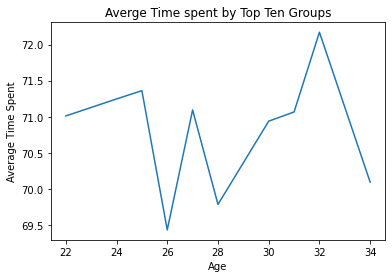

In [105]:
plt.plot(avg_time["Age Group"], avg_time["Daily Time Spent on Site"])
plt.title("Averge Time spent by Top Ten Groups")
plt.xlabel("Age")
plt.ylabel("Average Time Spent")
plt.show()

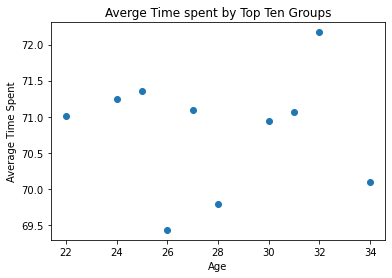

In [108]:
plt.scatter(avg_time["Age Group"], avg_time["Daily Time Spent on Site"])
plt.title("Averge Time spent by Top Ten Groups")
plt.xlabel("Age")
plt.ylabel("Average Time Spent")
plt.show()

**Top Ten Countries clicking Ads**

In [116]:
df.groupby('Country').sum()['Clicked on Ad'].nlargest(n=10)

Country
Australia        7
Ethiopia         7
Turkey           7
Liberia          6
Liechtenstein    6
South Africa     6
Afghanistan      5
France           5
Hungary          5
Mayotte          5
Name: Clicked on Ad, dtype: int64

In [117]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
914,41.86,39,53041.77,128.62,Open-source stable paradigm,Hawkinsbury,1,Ethiopia,2016-03-26 15:28:07,1
280,46.37,52,32847.53,144.27,De-engineered solution-oriented open architecture,Alexanderfurt,0,French Guiana,2016-01-05 00:02:53,1
743,62.12,37,50671.60,105.86,Re-engineered intangible software,Johnsonview,1,Liechtenstein,2016-03-18 13:00:12,1
398,76.24,40,75524.78,198.32,Managed impactful definition,Bakerhaven,1,Burkina Faso,2016-05-31 23:42:26,0
454,82.12,52,28679.93,201.15,Fully-configurable client-driven customer loyalty,East Dana,1,Germany,2016-02-03 10:40:27,1
252,84.54,33,64902.47,204.02,Synchronized stable complexity,North Tracyport,1,Moldova,2016-03-02 10:07:43,0
590,66.77,25,58847.07,141.13,Cross-platform zero-defect structure,Johnstonmouth,0,Iran,2016-07-09 11:18:02,1
903,84.76,30,61039.13,178.69,Monitored 24/7 moratorium,South Pamela,0,Venezuela,2016-05-14 23:08:14,0
955,54.55,44,41547.62,109.04,Re-engineered optimal policy,West Gabriellamouth,0,Canada,2016-02-04 03:10:17,1
929,82.49,45,38645.40,130.84,Assimilated multi-state paradigm,Williamsfort,0,Dominican Republic,2016-05-31 00:58:37,1


In [118]:
df.groupby('City').sum()['Clicked on Ad'].nlargest(n=10)

City
Lake David      2
Lake James      2
Lisamouth       2
Michelleside    2
Millerbury      2
Robertfurt      2
South Lisa      2
West Amanda     2
West Shannon    2
Williamsport    2
Name: Clicked on Ad, dtype: int64

In [125]:
tmp = df.groupby('Area Income').mean()

,Daily Time Spent on Site,Age,Daily Internet Usage,Male,Clicked on Ad
Area Income,,,,,
13996.50,68.58,41.0,171.54,1.0,1.0
14548.06,66.26,47.0,179.04,1.0,1.0
14775.50,52.67,44.0,191.26,0.0,1.0
15598.29,64.63,45.0,158.80,1.0,1.0
15879.10,58.05,32.0,195.54,1.0,1.0
...,...,...,...,...,...
78092.95,66.14,41.0,165.27,0.0,0.0
78119.50,68.88,37.0,179.58,0.0,0.0
78520.99,67.85,41.0,202.70,1.0,1.0


In [137]:

bins = [5000, 10000, 20000, 30000, 50000, 70000, 100000]
tmp['binned'] = pd.cut(tmp.index, bins)

In [138]:
tmp.sample(10)

,Daily Time Spent on Site,Age,Daily Internet Usage,Male,Clicked on Ad,binned
Area Income,,,,,,
67633.44,75.70,29.0,215.44,0.0,0.0,"(50000, 70000]"
65883.39,76.84,32.0,231.59,0.0,0.0,"(50000, 70000]"
62784.85,56.70,48.0,123.13,0.0,1.0,"(50000, 70000]"
46339.25,56.01,26.0,127.26,0.0,1.0,"(30000, 50000]"
71157.05,75.81,40.0,229.19,0.0,0.0,"(70000, 100000]"
50356.06,79.89,30.0,241.38,1.0,0.0,"(50000, 70000]"
61005.87,75.74,25.0,215.25,1.0,0.0,"(50000, 70000]"
58114.30,87.35,35.0,158.29,1.0,0.0,"(50000, 70000]"
37345.24,58.22,29.0,120.90,0.0,1.0,"(30000, 50000]"


In [144]:
tmp.reset_index()

,Area Income,Daily Time Spent on Site,Age,Daily Internet Usage,Male,Clicked on Ad,binned
0,13996.50,68.58,41.0,171.54,1.0,1.0,"(10000, 20000]"
1,14548.06,66.26,47.0,179.04,1.0,1.0,"(10000, 20000]"
2,14775.50,52.67,44.0,191.26,0.0,1.0,"(10000, 20000]"
3,15598.29,64.63,45.0,158.80,1.0,1.0,"(10000, 20000]"
4,15879.10,58.05,32.0,195.54,1.0,1.0,"(10000, 20000]"
...,...,...,...,...,...,...,...
995,78092.95,66.14,41.0,165.27,0.0,0.0,"(70000, 100000]"
996,78119.50,68.88,37.0,179.58,0.0,0.0,"(70000, 100000]"
997,78520.99,67.85,41.0,202.70,1.0,1.0,"(70000, 100000]"
998,79332.33,60.70,43.0,192.60,1.0,0.0,"(70000, 100000]"


In [147]:
res = tmp.groupby('binned').sum()['Clicked on Ad']

In [148]:
res

binned
(5000, 10000]        0.0
(10000, 20000]      10.0
(20000, 30000]      49.0
(30000, 50000]     199.0
(50000, 70000]     212.0
(70000, 100000]     30.0
Name: Clicked on Ad, dtype: float64

<AxesSubplot:ylabel='Frequency'>

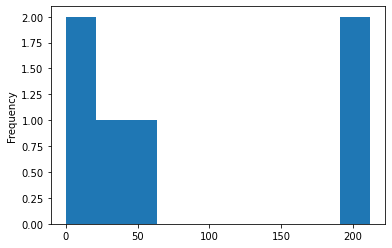

In [149]:
res.plot.hist(by='binned', bins=10)

# **TO DO : time at which most click occured, click by salary group**